In [1]:
import pandas as pd
import numpy as np
from readFile import split_into_values, toRPdata
# columns 와 value는 사용자 입력
df = pd.read_csv('resources/AXISX_resample.csv')
columns = ['chip', 'wire', 'segment']
value = ['value']
#df = pd.read_csv('resources/Dataset1.csv')
#columns = ['Process', 'Step']
#value = ['Value']

df = df.loc[:, columns + value] #('chip', 'wire', 'value')는 사용자 입력
result = split_into_values(df, columns)
result

,0,1,2,3,4,5,6,7,8,9,...,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230
0,1.873603,2.015115,2.033436,1.987634,1.932988,1.971524,2.002796,1.975631,1.870761,1.691660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.417595,3.417911,3.412541,3.379690,3.314304,3.225544,3.105196,2.983900,2.844916,2.692980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.328519,3.335468,3.329150,3.301038,3.280822,3.235020,3.174372,3.097615,3.018646,2.927043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.184310,0.159040,0.189680,0.249064,0.339088,0.448065,0.658121,0.966098,1.277234,1.586790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.182731,0.134718,0.157145,0.259804,0.454066,0.663175,0.883339,1.119612,1.411480,1.787370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,3.328519,3.331362,3.322201,3.297879,3.246075,3.152261,3.023068,2.872713,2.711301,2.533464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1326,0.203894,0.151775,0.163462,0.256329,0.390891,0.613267,0.849856,1.153411,1.513191,1.939305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1327,0.204842,0.149564,0.153986,0.207369,0.311923,0.477441,0.644222,0.861228,1.049173,1.251016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1328,0.312871,0.254118,0.295813,0.400999,0.551987,0.652119,0.694762,0.754778,0.927561,1.158781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#시계열 셋 길이 통일
result_row=
min=result.dropna(axis='columns')
min_len=len(min.columns)

from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
result_ = TimeSeriesResampler(sz=min_len).fit_transform(result)

result_=result_.reshape(1330,min_len)
result_

array([[1.873603  , 2.02744004, 1.96875629, ..., 3.17376315, 3.32278718,
        3.405276  ],
       [3.417595  , 3.38088458, 3.11394858, ..., 2.71521804, 3.08375609,
        3.293772  ],
       [3.328519  , 2.77752785, 1.58594571, ..., 1.74077522, 3.30745863,
        0.295182  ],
       ...,
       [0.204842  , 0.2068837 , 0.64118962, ..., 0.78403342, 0.42380805,
        0.406369  ],
       [0.312871  , 0.25601323, 0.30537536, ..., 0.40168836, 0.40757555,
        0.382995  ],
       [0.302447  , 0.2717609 , 0.46650598, ..., 0.57960615, 0.52370211,
        0.611056  ]])

In [12]:
#수치형 변수 정규화
from sklearn.preprocessing import StandardScaler
result_norm = StandardScaler().fit_transform(result_)

In [13]:
#주성분 분석 실시하기
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #PCA 객체 생성 (주성분 갯수 2개 생성)
result_pca = pca.fit_transform(result_norm)

In [15]:
#같은 클러스터들끼리 리스트형태로 합침

result_label=[1,2,3,4,5,6,7]*190
result_list=result_pca.tolist()

result_cluster=[[],[],[],[],[],[],[]]

for i in range(0,1330):
    if result_label[i] ==1:
        result_cluster[0].append(result_list[i])
    elif result_label[i] ==2:
        result_cluster[1].append(result_list[i])
    elif result_label[i] ==3:
        result_cluster[2].append(result_list[i])
    elif result_label[i] ==4:
        result_cluster[3].append(result_list[i])
    elif result_label[i] ==5:
        result_cluster[4].append(result_list[i])
    elif result_label[i] ==6:
        result_cluster[5].append(result_list[i])
    elif result_label[i] ==7:
        result_cluster[6].append(result_list[i])

result_arr = np.array(result_cluster)

In [19]:
result_cluster[3]

[[-9.486193926228893, 2.9550425122977066],
 [-9.575346417450122, 2.9444864539848203],
 [-9.631681491636597, 3.0637589150108804],
 [-9.54204000869658, 2.9346275371707438],
 [-9.55496721060139, 2.9026612039462827],
 [-9.582807245517836, 3.001957622715312],
 [-9.658011395756924, 2.9480850910604697],
 [-9.519794519880707, 2.9186372365639297],
 [-9.643344556957118, 2.938197903530159],
 [-9.373277507200353, 2.8763871999019286],
 [-9.654638073530338, 2.925598998754673],
 [-9.64755823347039, 2.853124983953808],
 [-9.634842062634391, 2.986626049908497],
 [-9.65741803155208, 2.9241735050344277],
 [-9.605848892701543, 3.080202560875422],
 [-9.648319167879023, 2.999672093923287],
 [-9.59534399404122, 2.972449216852964],
 [-9.365964815076081, 2.9194768666906903],
 [-9.64428367230309, 2.969019483268282],
 [-9.638761081936945, 2.7558393871050844],
 [-9.585093192165768, 2.7719997037703004],
 [-9.624972105633672, 2.787766108854099],
 [-9.621853492983384, 2.8460616610414102],
 [-9.613925918969406, 2.732

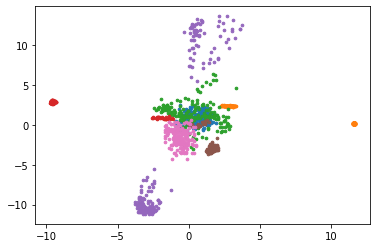

In [16]:
import matplotlib.pyplot as plt
plt.scatter(result_arr[0][:,0], result_arr[0][:,1],s=7)
plt.scatter(result_arr[1][:,0], result_arr[1][:,1],s=7)
plt.scatter(result_arr[2][:,0], result_arr[2][:,1],s=7)
plt.scatter(result_arr[3][:,0], result_arr[3][:,1],s=7)
plt.scatter(result_arr[4][:,0], result_arr[4][:,1],s=7)
plt.scatter(result_arr[5][:,0], result_arr[5][:,1],s=7)
plt.scatter(result_arr[6][:,0], result_arr[6][:,1],s=7)